In [154]:
from new_stations import *
from time_series_model import *
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf
from scipy import signal
from scipy import stats








In [14]:
data, weather = load_data()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [15]:
data = feature_addition(data)

In [16]:
sf = model_city(data,1)

In [90]:
def month_sep(df, year, month):
    cdf = df[(df.year == year) & (df.month == month)]
    ndf = df[(df.year == year) & (df.month == (month-1))]
    return cdf, ndf

In [91]:
#cdf = current month df
#ndf = next month df
cdf, ndf = month_sep(sf, 2018, 5)

In [92]:
#proposed stations
ps = new_stn_coords(cdf, ndf)

In [93]:
ps

[230.0, 231.0, 7.0, 239.0, 342.0]

In [94]:
#neighbors for each proposed location
#id and coordinate combo for each station
neighbors, id_coord= knn_proposed_stn(cdf, ndf, ps)

In [95]:
neighbors

{230: [160, 203, 191],
 231: [160, 203, 191],
 7: [235, 160, 191],
 239: [235, 160, 203],
 342: [66, 343, 49]}

In [96]:
qtr = days_for_ts(sf, cdf,3)

/Users/michellehoang/galvanize/Capstone_Project/time_series_model.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tsdf['days'] = 1
/Users/michellehoang/galvanize/Capstone_Project/time_series_model.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tsdf['days'][tsdf.month == mon] = tsdf.day * mult
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:8672: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_i

In [97]:
# t = 230
# print("The origin station is {}.".format(t))
# print("The 3 closest neighbors are: {}, {}, {}".format(int(neighbors.get(t)[0]),int(neighbors.get(t)[1]),int(neighbors.get(t)[2])))
# plt.figure(figsize = (10,10))
# ll,rr = -122.50, -122.36
# bb = 37.73
# plt.xlim(ll,rr)
# plt.ylim(bb, bb+(rr-ll))
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.title("Map of Ford GoBike stations in San Francisco")
# plt.scatter(qtr.end_station_longitude, qtr.end_station_latitude, s=1, c=('r'))
# plt.scatter(id_coord.get(t)[0], id_coord.get(t)[1], s=20, marker='x', c=('b'))

# for st in neighbors.get(t):
#     plt.scatter(id_coord.get(st)[0],id_coord.get(st)[1], s= 10, c='g')
# plt.show()



In [98]:
def plt_stn():
    row_sze = len(neighbors)
    col_sze = len(next(iter(neighbors.values())))
    rnge = row_sze*col_sze
    fig = plt.figure(figsize=(10,10))
    graph = 1
    for k, v in neighbors.items():
        num = 1
        for s_id in v:
            plt.subplot(rnge,1,graph)
            plt.subplots_adjust(top=6, bottom =0.1)
            plt.xlim(0,90)
            plt.xlabel("days")
            plt.ylabel("trips per day")
            plt.title("This is station {}, and it is neighbor #{} for station {}".format(s_id, num, k))
            ts = days_count(qtr, s_id)
            plt.plot(ts[:,0],ts[:,1])
            num+=1
            graph+=1

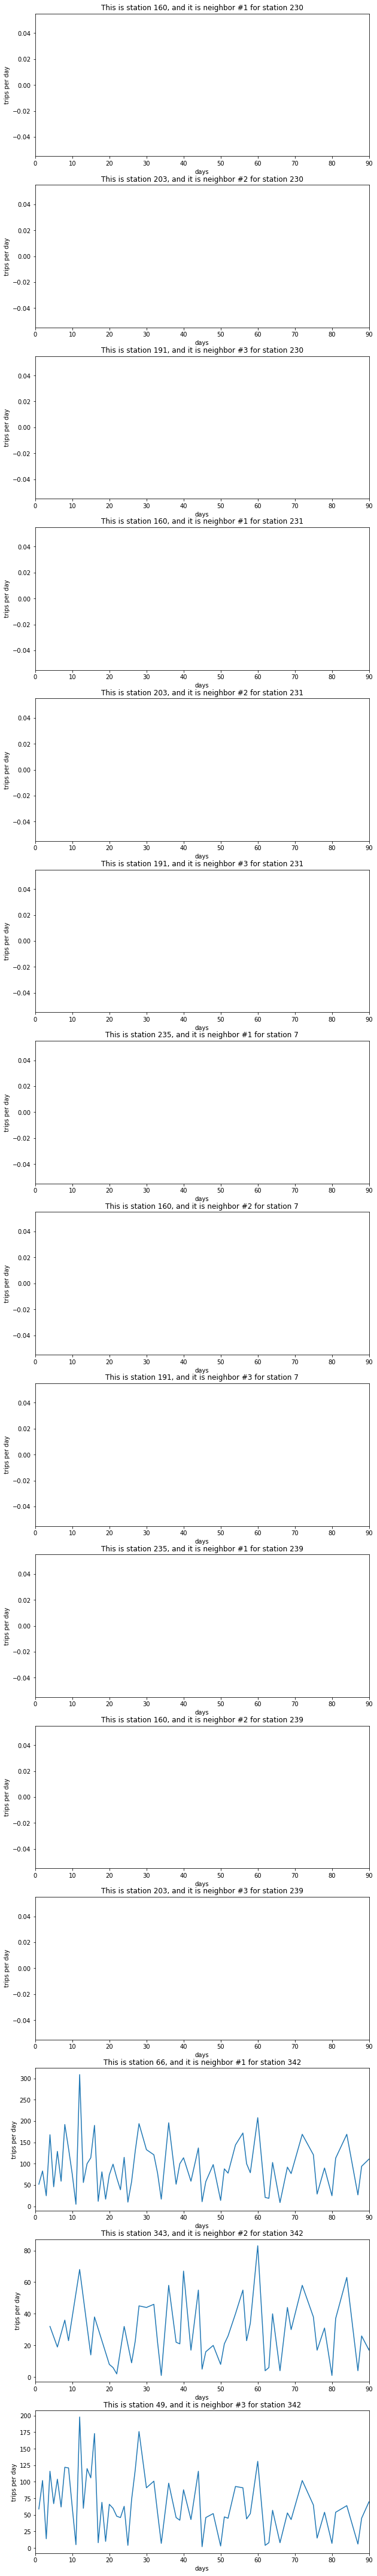

In [99]:
plt_stn()

In [146]:
ts = days_count(qtr, 66)

In [147]:
tseries = pd.Series(ts[:,1])
tseries

0      52
1      83
2      25
3     168
4      46
5     129
6      59
7     192
8     136
9      76
10      5
11    309
12     56
13    100
14    114
15    190
16     12
17     81
18     17
19     74
20     99
21     67
22     39
23    115
24     10
25     58
26    131
27    194
28    133
29    121
     ... 
44    144
45    172
46    100
47     79
48    208
49     21
50     19
51    103
52      9
53     92
54     77
55    169
56    121
57     29
58     90
59     25
60    113
61    169
62     27
63     94
64    111
65     96
66    104
67     82
68     12
69     18
70     20
71     91
72     93
73     90
Length: 74, dtype: int64

In [158]:
test = sm.tsa.stattools.adfuller(tseries)
print("ADF p-value: {0:2.2f}".format(test[1]))

ADF p-value: 0.00


In [159]:
trip_matrix = tseries.as_matrix()
trip_matrix

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([ 52,  83,  25, 168,  46, 129,  59, 192, 136,  76,   5, 309,  56,
       100, 114, 190,  12,  81,  17,  74,  99,  67,  39, 115,  10,  58,
       131, 194, 133, 121,  78,  17, 196,  52, 100, 114,  59, 137,  11,
        58,  98,  14,  88,  78, 144, 172, 100,  79, 208,  21,  19, 103,
         9,  92,  77, 169, 121,  29,  90,  25, 113, 169,  27,  94, 111,
        96, 104,  82,  12,  18,  20,  91,  93,  90])

In [160]:
trip_model = ARIMA(trip_matrix, order=(3, 1, 0)).fit()

In [161]:
predictions = trip_model.predict(75, 85, typ='levels')
predictions

array([72.74784937, 89.98791487, 86.01175161, 84.9351171 , 84.11629595,
       87.18819757, 85.84072757, 86.12150233, 86.44082308, 86.99141686,
       86.86793656, 87.20259747])

In [165]:
test = np.append(trip_matrix, predictions)

In [166]:
test1 = pd.Series(test)

In [167]:
test1

0      52.000000
1      83.000000
2      25.000000
3     168.000000
4      46.000000
5     129.000000
6      59.000000
7     192.000000
8     136.000000
9      76.000000
10      5.000000
11    309.000000
12     56.000000
13    100.000000
14    114.000000
15    190.000000
16     12.000000
17     81.000000
18     17.000000
19     74.000000
20     99.000000
21     67.000000
22     39.000000
23    115.000000
24     10.000000
25     58.000000
26    131.000000
27    194.000000
28    133.000000
29    121.000000
         ...    
56    121.000000
57     29.000000
58     90.000000
59     25.000000
60    113.000000
61    169.000000
62     27.000000
63     94.000000
64    111.000000
65     96.000000
66    104.000000
67     82.000000
68     12.000000
69     18.000000
70     20.000000
71     91.000000
72     93.000000
73     90.000000
74     72.747849
75     89.987915
76     86.011752
77     84.935117
78     84.116296
79     87.188198
80     85.840728
81     86.121502
82     86.440823
83     86.9914

In [ ]:
plt.plot(test1.index[0:74], test1[0:85], c='r',test1.index[74:], test1[74:], c='r' )


In [101]:
# X = ts
# y = ts[:,0]
# from sklearn.model_selection import TimeSeriesSplit
# tscv = TimeSeriesSplit(n_splits=)
# for train_index, test_index in tscv.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

In [102]:
X = ts[:,1]

In [103]:
#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction

In [104]:
num_elem = len(X)

In [105]:
#Use 70% of data as training, rest 30% to Test model
TrainingSize = int(num_elem * 0.7)

TrainingData = X[0:TrainingSize]
TestData = X[TrainingSize:num_elem]

In [106]:
#new arrays to store actual and predictions
Actual = [x for x in TrainingData]
Predictions = []

In [114]:
model00 = ARIMA(TrainingData, dates=None,order=(2,1,1))
model11 = model00.fit(disp=1)
model11.forecast()

(array([106.56175566]),
 array([61.96374696]),
 array([[-14.88495672, 228.00846804]]))

In [113]:
model11.predict(120,150)

array([ 7.36018648e+01, -6.12495242e+01,  2.26470967e+01,  4.36635245e+00,
       -1.27033638e+01,  8.67234020e+00, -2.66221117e+00, -1.41173076e+00,
        1.91696549e+00, -1.35760933e+00,  1.03090927e-01,  1.42709077e-01,
       -4.54641722e-01,  3.10306385e-02, -1.45584498e-01, -1.85032249e-01,
       -8.37400395e-02, -1.53454765e-01, -1.34107171e-01, -1.23409247e-01,
       -1.39853217e-01, -1.30193907e-01, -1.31944076e-01, -1.34206724e-01,
       -1.31633219e-01, -1.32917671e-01, -1.32834347e-01, -1.32408170e-01,
       -1.32797766e-01, -1.32635618e-01, -1.32621142e-01, -1.32695904e-01,
       -1.32638795e-01, -1.32657817e-01, -1.32663920e-01, -1.32651455e-01,
       -1.32659552e-01, -1.32657576e-01, -1.32656106e-01, -1.32658102e-01,
       -1.32656996e-01, -1.32657153e-01, -1.32657448e-01, -1.32657140e-01,
       -1.32657284e-01, -1.32657282e-01, -1.32657228e-01, -1.32657274e-01,
       -1.32657256e-01, -1.32657253e-01, -1.32657263e-01, -1.32657256e-01,
       -1.32657258e-01, -

In [81]:
# #Print MSE to see how good the model is
# Error = mean_squared_error(TestData, Predictions)
# print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)
# # plot
# pyplot.plot(TestData)
# pyplot.plot(Predictions, color='red')
# pyplot.show()

In [80]:
# #in a for loop, predict values using ARIMA model
# for timepoint in range(len(TestData)):
#     ActualValue =  TestData[timepoint]
#     #forcast value
#     Prediction = StartARIMAForecasting(Actual, 3,1,0)    
#     print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
#     Predictions.append(Prediction)
#     Actual.append(ActualValue)